# CAR PRICE PREDICTION WITH MACHINE LEARNING
# TASK:- 3


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
car_data=pd.read_csv('E:/dataset/car data.csv')

In [3]:
car_data


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car_data["Selling_Price"].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [10]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
print(car_data['Fuel_Type'])


0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
296    Diesel
297    Petrol
298    Petrol
299    Diesel
300    Petrol
Name: Fuel_Type, Length: 301, dtype: object


In [12]:
print(car_data['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [13]:
print(car_data['Transmission'].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [14]:
print(car_data['Selling_type'].value_counts())

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [15]:
fuel_type=car_data['Fuel_Type'].value_counts()
seller =car_data['Selling_type']
transmission_type=car_data['Transmission']
seller_type=car_data['Owner']


In [16]:
from matplotlib import style

<Figure size 640x480 with 0 Axes>

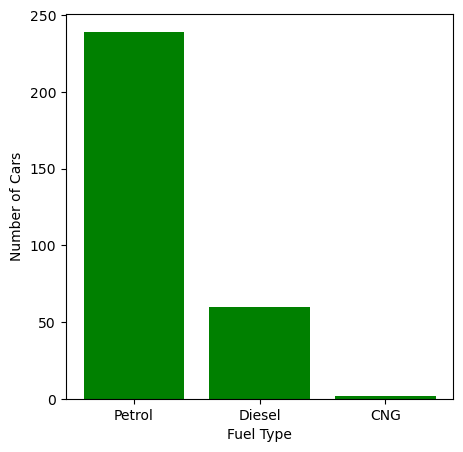

In [17]:
fig = plt.suptitle('Visualization according to the category of fuel')
fig = plt.figure(figsize=(5, 5))
fuel_type_counts = car_data["Fuel_Type"].value_counts()
plt.bar(fuel_type_counts.index, fuel_type_counts, color='green')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()

<Figure size 640x480 with 0 Axes>

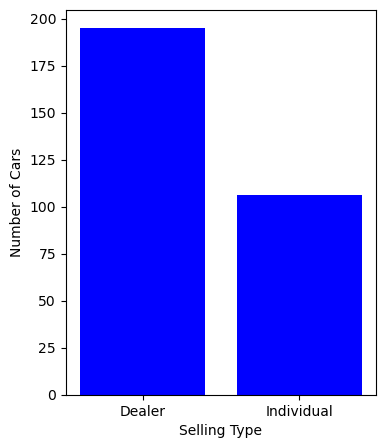

In [18]:
fig = plt.suptitle('Visualization according to the category of seller')
fig = plt.figure(figsize=(4, 5))
selling_type = car_data["Selling_type"].value_counts()
plt.bar(selling_type.index, selling_type, color='blue')
plt.xlabel('Selling Type')
plt.ylabel('Number of Cars')
plt.show()

<Figure size 640x480 with 0 Axes>

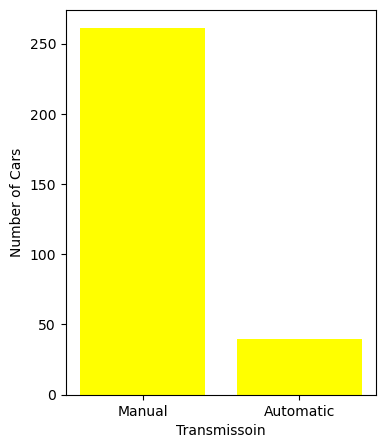

In [19]:
fig = plt.suptitle('Visualization according to the category of Transmission')
fig = plt.figure(figsize=(4, 5))
selling_type = car_data["Transmission"].value_counts()
plt.bar(selling_type.index, selling_type, color='yellow')
plt.xlabel('Transmissoin')
plt.ylabel('Number of Cars')
plt.show()

In [20]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


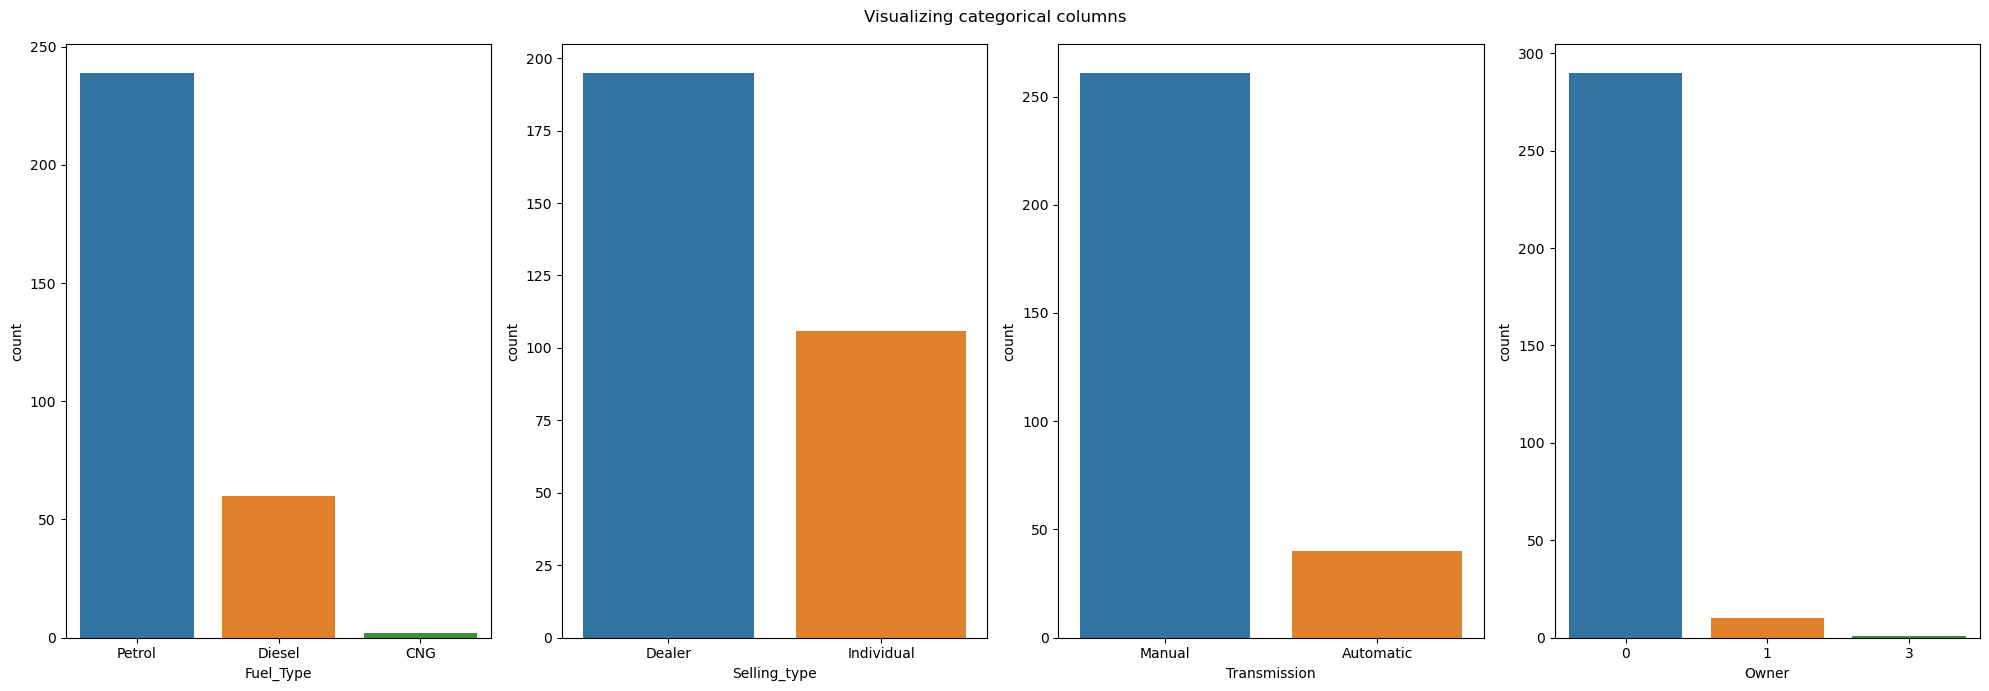

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


car_data_reset = car_data.reset_index()
fig, axes = plt.subplots(1, 4, figsize=(20, 7))
fig.suptitle('Visualizing categorical columns')
sns.countplot(x='Fuel_Type', data=car_data_reset,ax=axes[0] )
sns.countplot(x='Selling_type', data=car_data_reset, ax=axes[1])
sns.countplot(x='Transmission', data=car_data_reset, ax=axes[2])
sns.countplot(x='Owner', data=car_data_reset, ax=axes[3])
plt.tight_layout()
plt.show()


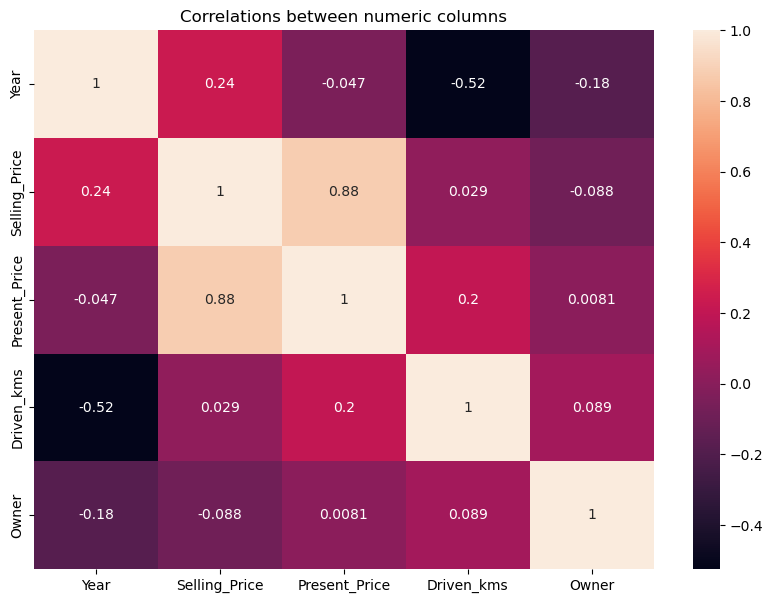

In [22]:
numeric_columns = car_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title('Correlations between numeric columns')
plt.show()

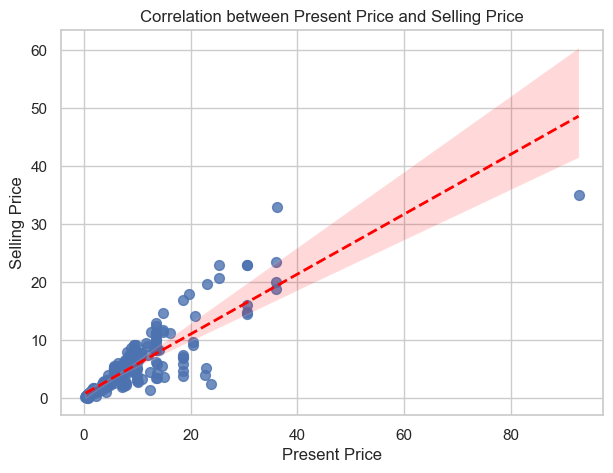

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Present Price and Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
ax.get_lines()[0].set_linestyle('--')  
ax.get_lines()[0].set_linewidth(2)     
plt.show()


In [24]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (301, 7)
Shape of y is:  (301,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


In [26]:
scaler = StandardScaler()

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train_scaled, y_train)


LinearRegression()

In [30]:
pred = model.predict(X_test_scaled)


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  1.2699697249044801
MSE:  3.5440034651103804
R2 score:  0.8295279135576223


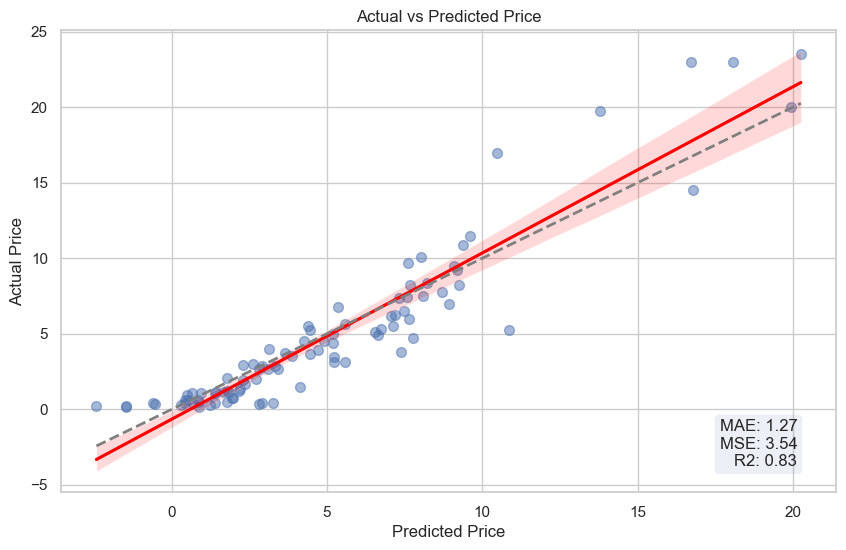

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x=pred, y=y_test, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.plot([min(pred), max(pred)], [min(pred), max(pred)], '--', color='gray', linewidth=2)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
mae = metrics.mean_absolute_error(pred, y_test)
mse = metrics.mean_squared_error(pred, y_test)
r2 = metrics.r2_score(pred, y_test)
plt.text(0.95, 0.05, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nR2: {r2:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, bbox=dict(boxstyle='round', alpha=0.1))
plt.show()
